# Recomendation Systems

Recommendation systems are essential tools in today's digital landscape, guiding users to personalized content and products. These systems employ algorithms to analyze user preferences and behavior, enabling them to suggest relevant items. In this project, we explore and implement various recommendation approaches to enhance user experiences in e-commerce.

- **Content-Based Filtering:** Content-based filtering recommends items based on their attributes, such as product descriptions, using similarity measures.
- **Memory-Based Collaborative Filtering:** Memory-based collaborative filtering suggests items based on user behavior and similarities among users or items.
- **Model-Based Collaborative Filtering:** Model-based collaborative filtering employs mathematical models, like matrix factorization, to make recommendations by identifying latent patterns in user-item interactions.

# Dataset Description

For this project, we have utilized a dataset containing valuable information about e-commerce products. The dataset encompasses product names, user reviews, review ratings, reviewer names, and product URLs. Each entry in the dataset provides insights into user interactions with these products, forming the foundation for our recommendation system.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('shoes-ratings.csv')
data.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [2]:
data.shape

(6823, 11)

In [3]:
data = data.dropna()
data = data.drop_duplicates(subset='product_name', keep='first')
data = data.reset_index(drop=True)
print(data.shape)
data.head(5)

(646, 11)


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07S1XM3L7,"adidas Women's Retrorun Shoes Running, Core Bl...",Lindsay,Perfect right outta the box,True to size. If between I'd probably go with ...,5.0,True,Reviewed in Canada on 20 October 2021,One person found this helpful,b64632c5-6f24-51eb-9275-6614fed29f1a,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B0125TMZGK,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",Amazon Customer,Comfortable and attractive,I have hard to fit feet and often a wide fitti...,5.0,True,Reviewed in Canada on 8 October 2018,2 people found this helpful,bce0114a-c0fe-5472-bbb8-377cb21dc853,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B082W5GQ5L,"adidas Daily 3.0 Skate Shoe, Grey, 3 US Unisex...",consumer,Thank you!,These shoes are cute and jus fine. I wanted to...,5.0,True,Reviewed in the United States on 22 October 2021,3 people found this helpful,1da9db76-74be-5eec-af0b-bcaa1bd0aa9e,24/12/2021 02:26:26


In [4]:
data[["url","product_name","review_rating"]]

,url,product_name,review_rating
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,5.0
1,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",5.0
2,https://www.amazon.co.uk/dp/B07S1XM3L7,"adidas Women's Retrorun Shoes Running, Core Bl...",5.0
3,https://www.amazon.co.uk/dp/B0125TMZGK,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",5.0
4,https://www.amazon.co.uk/dp/B082W5GQ5L,"adidas Daily 3.0 Skate Shoe, Grey, 3 US Unisex...",5.0
...,...,...,...
641,https://www.amazon.co.uk/dp/B07SG21WC5,Men Women Trainers Air Cushion Sneakers Outdoo...,5.0
642,https://www.amazon.co.uk/dp/B07SBG7LVB,"Nautica Men&#39;s Spinnaker Lace-Up Boat Shoe,...",3.0
643,https://www.amazon.co.uk/dp/B07MX7DX8F,Skechers Women&#39;s Breathe-Easy-Days End Sne...,5.0
644,https://www.amazon.co.uk/dp/B08GDV6DN6,adidas Zx 2k Boost Mens Fv9993 Size 11,3.0


In [5]:
print("Basic Dataset Statistics:")
print(data.describe())

Basic Dataset Statistics:
       review_rating
count     646.000000
mean        3.927245
std         1.455053
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000


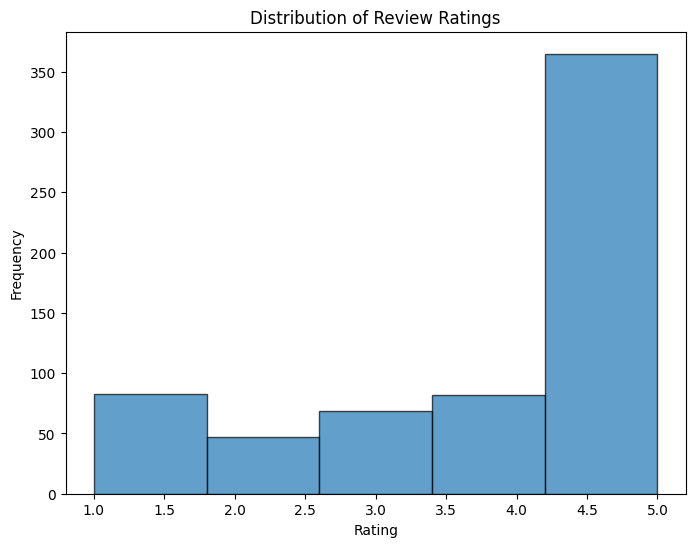

In [6]:
# Distribution of review ratings
plt.figure(figsize=(8, 6))
plt.hist(data['review_rating'], bins=5, edgecolor='k', alpha=0.7)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Count of unique products and reviewers
num_products = data['product_name'].nunique()
num_reviewers = data['reviewer_name'].nunique()

print(f"Number of Unique Products: {num_products}")
print(f"Number of Unique Reviewers: {num_reviewers}")

Number of Unique Products: 646
Number of Unique Reviewers: 592


In [8]:
# Top 10 most reviewed products
top_reviewed_products = data['product_name'].value_counts().head(10)
print("\nTop 10 Most Reviewed Products:")
print(top_reviewed_products)


Top 10 Most Reviewed Products:
Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK                                                                                    1
Marc O'Polo Men's 00725006301125 Fashion Boot, 940 Anthracite, 9.5 UK                                                                              1
Mens Slip On Trainers Walking Barefoot Memory Foam Casual Shoes Indoor Hypersoft Sneakers Comfy Work Gym Cross Trainers Loafers for Men 10 Blue    1
Reef Men's Tri Waters Flip Flop, Aqua Blue, 11 UK                                                                                                  1
Asics Womens Gel-Kahana 8 Shoes, 8.5 UK, Mid Grey/Carbon/Limelight                                                                                 1
JENN ARDOR Womens Slip On Sneakers Perforated Flats Comfortable Walking Fashion Tennis Shoes Camo Size: 4.5 UK                                     1
Propét Women's Ladybug Mary Jane Flat, Navy Suede, 11 Narrow              

# Content Based Filtering

- **Utilizes Product Attributes:** Content-based filtering recommends products based on their textual attributes, such as product names, descriptions, and user reviews.

- **Measures Similarity:** It calculates similarity between products using techniques like cosine similarity, enabling the system to suggest items similar to those a user has interacted with.

- **Personalized Recommendations:** Content-based filtering offers personalized recommendations by matching the content of products with a user's preferences, enhancing user engagement and satisfaction.



In [9]:
import matplotlib.pyplot as plt
import numpy as np
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=7709f633b61dce95bcd19c2e06170d21d1227c69827e815e223e098f93b709fa
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [10]:
X = np.array(data.product_name)
data

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07S1XM3L7,"adidas Women's Retrorun Shoes Running, Core Bl...",Lindsay,Perfect right outta the box,True to size. If between I'd probably go with ...,5.0,True,Reviewed in Canada on 20 October 2021,One person found this helpful,b64632c5-6f24-51eb-9275-6614fed29f1a,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B0125TMZGK,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",Amazon Customer,Comfortable and attractive,I have hard to fit feet and often a wide fitti...,5.0,True,Reviewed in Canada on 8 October 2018,2 people found this helpful,bce0114a-c0fe-5472-bbb8-377cb21dc853,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B082W5GQ5L,"adidas Daily 3.0 Skate Shoe, Grey, 3 US Unisex...",consumer,Thank you!,These shoes are cute and jus fine. I wanted to...,5.0,True,Reviewed in the United States on 22 October 2021,3 people found this helpful,1da9db76-74be-5eec-af0b-bcaa1bd0aa9e,24/12/2021 02:26:26
...,...,...,...,...,...,...,...,...,...,...,...
641,https://www.amazon.co.uk/dp/B07SG21WC5,Men Women Trainers Air Cushion Sneakers Outdoo...,Ilaria,Scarpe running,Ho comprato queste scarpe per poter iniziare a...,5.0,True,Reviewed in Italy on 23 March 2018,7 people found this helpful,95e04b88-5609-5059-9c8b-270e74fa76c9,24/12/2021 02:29:37
642,https://www.amazon.co.uk/dp/B07SBG7LVB,"Nautica Men&#39;s Spinnaker Lace-Up Boat Shoe,...",titane,Wel done. Solid product for me. Nice quality. ...,I like the good and solid construction as the ...,3.0,True,Reviewed in Canada on 26 August 2019,One person found this helpful,23665a7a-767e-5bcd-912f-f9a622e3671e,24/12/2021 02:29:38
643,https://www.amazon.co.uk/dp/B07MX7DX8F,Skechers Women&#39;s Breathe-Easy-Days End Sne...,K.B.,Comfy and Perfect Fit,OMG!!! I so love this shoes! Fits perfect and ...,5.0,True,Reviewed in the United States on 7 June 2020,7 people found this helpful,3c33ee8c-6a2a-5cb4-830b-216a2a5d91e8,24/12/2021 02:29:38
644,https://www.amazon.co.uk/dp/B08GDV6DN6,adidas Zx 2k Boost Mens Fv9993 Size 11,Anisha,Nice style but not comfort.,After this purchase I'm not sure I'll purchase...,3.0,True,Reviewed in the United States on 26 May 2021,One person found this helpful,de1572cc-74ec-5c3c-9c3f-abed295fdd65,24/12/2021 02:29:38


In [11]:
data=data[["product_name","url","review_rating"]]

text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

In [12]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.614098,-4.018985,0.469150,-3.384584,0.817139
1,2.687491,-5.161328,1.767503,1.275849,0.327201
2,2.577268,-6.323755,-0.381935,3.689544,-1.606961
3,5.399793,3.133312,7.342473,3.107056,1.430824
4,-1.097255,-2.444745,-3.425184,-1.034492,-1.520093


In [13]:
cosine_sim_matrix = cosine_similarity(X)

def get_recommendations(index, num_recommendations=5, print_recommendations=False, print_urls=False):
    # Get the indices of most similar products (excluding itself)
    similar_indices = cosine_sim_matrix[index].argsort()[::-1][1:num_recommendations+1]

    # Get the recommended product names and indices
    recommended_names = data['product_name'].iloc[similar_indices].values
    recommended_indices = similar_indices

    if print_recommendations:
        current_product_name = data['product_name'].iloc[index]
        print(f"Recommendations for '{current_product_name}':")
        for i, product_name in enumerate(recommended_names):
            print(f"{i+1}. {product_name}")

    if print_urls:
        print("URLs for Recommended Products:")
        for i, index in enumerate(recommended_indices):
            url = data['url'].iloc[index]
            print(f"{i+1}. {url}")

    # return recommended_names, recommended_indices


In [14]:
get_recommendations(1,10,True,True)

Recommendations for 'GUESS Women's Bradly Gymnastics Shoe, White, 7 UK':
1. ECCO Women's Biom Life Low-Top Sneakers, (White/White 50874), 7 UK
2. Minnetonka Women's Gabi Slip On Shoes Round Toe Taupe 8.5 M
3. adidas Originals Women's Tubular Shadow W Running Shoe, Core Black/Black/Legacy White, 9.5
4. Klasified Women's Transparent Clear Sneaker Shoe, White, 5.5 UK
5. adidas Women's RUNFALCON Track and Field Shoe, Mauve/FTWR White/Clear Pink, 9.5 UK
6. Skechers Womens Block and Pop Exercise Fashion Sneakers B/W US 9 Medium (B,M)
7. adidas Women's Edge Lux 3 Running Shoe, Grey/Cloud White, 10 UK
8. adidas Women's SenseBOOST GO w Running Shoe, Grey One/FTWR White/Shock Pink, 10 UK
9. New Balance Women's 890v6 Running Shoe, Vivid Coral/Black, 3.5 UK
10. adidas Women's Solar Glide Running Shoe, Yellow/Aqua/Dark Grey, 7
URLs for Recommended Products:
1. https://www.amazon.co.uk/dp/B07CN97W53
2. https://www.amazon.co.uk/dp/B01NAWAQAQ
3. https://www.amazon.co.uk/dp/B071F7VL2P
4. https://www.am

# Memory Based Collaborative Filtering
**User-Based Collaborative Filtering**

- In User-Based Collaborative Filtering, we check user-user similarity.
- User-based similarity is calculated by comparing the preferences or behaviors of one user to those of other users in the dataset.
- The idea is to find users who have similar tastes or preferences to the target user and recommend items that these similar users have liked or interacted with.
- Similarity metrics used here can include Pearson correlation, cosine similarity, or other distance metrics.

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

# Load the dataset
data = pd.read_csv('shoes-ratings.csv')
data = data.dropna()
data = data.drop_duplicates(subset='product_name', keep='first')
data = data.reset_index(drop=True)

print(data.shape)

# Create a user-item matrix
user_item_matrix = data.pivot_table(index='reviewer_name', columns='url', values='review_rating', fill_value=0)

# Calculate user similarity
user_similarity = 1 - pairwise_distances(user_item_matrix, metric='correlation')



(646, 11)


In [16]:
user_similarity

array([[ 1.        , -0.00155039, -0.00155039, ..., -0.00155039,
        -0.00155039, -0.00155039],
       [-0.00155039,  1.        , -0.00155039, ..., -0.00155039,
        -0.00155039, -0.00155039],
       [-0.00155039, -0.00155039,  1.        , ..., -0.00155039,
        -0.00155039, -0.00155039],
       ...,
       [-0.00155039, -0.00155039, -0.00155039, ...,  1.        ,
        -0.00155039, -0.00155039],
       [-0.00155039, -0.00155039, -0.00155039, ..., -0.00155039,
         1.        , -0.00155039],
       [-0.00155039, -0.00155039, -0.00155039, ..., -0.00155039,
        -0.00155039,  1.        ]])

In [20]:
# Function to recommend products to a user based on user similarity

def user_based_recommendation(reviewer_name, num_recommendations=5):
    # Find similar users based on user similarity
    user_id = data.index[data["reviewer_name"]==reviewer_name][0]
    similar_users = user_similarity[user_id].argsort()[::-1][1:]

    # Get the products not rated by the user
    user_rated_products = user_item_matrix.loc[reviewer_name]
    unrated_products = user_rated_products[user_rated_products == 0].index

    # Calculate the average rating of similar users for each unrated product
    product_ratings = user_item_matrix.loc[data["reviewer_name"][similar_users], unrated_products].mean()

    # Get the top recommended products
    recommended_products = product_ratings.sort_values(ascending=False).head(num_recommendations)

    return recommended_products

# Example usage

reviewer_name='Graziella'
recommendations = user_based_recommendation(reviewer_name)

print(f"Recommended products for user {reviewer_name}:")
print(recommendations)

Recommended products for user Graziella:
url
https://www.amazon.co.uk/dp/B07G4BDHQQ    0.160745
https://www.amazon.co.uk/dp/B004JRHIRI    0.160745
https://www.amazon.co.uk/dp/B07HK1L2DW    0.160745
https://www.amazon.co.uk/dp/B07L6BCLPY    0.160745
https://www.amazon.co.uk/dp/B089NCNFBR    0.160745
dtype: float64


**Item based Collaborative Filtering**

- In Item-Based Collaborative Filtering, the focus is on item-item similarity.
- Instead of comparing users, this approach evaluates the similarity between items.
- The goal is to recommend items that are similar to the ones a user has already interacted with or liked.

# Model-Based Collaborative Filtering

- **Matrix Factorization:** Model-based collaborative filtering employs matrix factorization techniques like Singular Value Decomposition (SVD) to break down user-item interactions into latent factors.
- **Hidden Patterns:** It identifies hidden patterns in the data, allowing the system to make recommendations based on the similarity of products that share these latent factors.
- **Personalized Recommendations:** This approach provides personalized recommendations by predicting user preferences based on learned latent features, enhancing recommendation accuracy.

In [21]:
data = pd.read_csv('shoes-ratings.csv')
data = data.dropna()
data = data.drop_duplicates(subset='product_name', keep='first')
data = data.reset_index(drop=True)

ratings_utility_matrix = data.pivot_table(values='review_rating', index='reviewer_name', columns='url', fill_value=0)
ratings_utility_matrix.head()

url,https://www.amazon.co.uk/dp/B0007T5JFK,https://www.amazon.co.uk/dp/B000BO4LCI,https://www.amazon.co.uk/dp/B000BO9WE0,https://www.amazon.co.uk/dp/B000I13RQA,https://www.amazon.co.uk/dp/B000K8FEYO,https://www.amazon.co.uk/dp/B000XB318Y,https://www.amazon.co.uk/dp/B001611GS2,https://www.amazon.co.uk/dp/B001MBLNU2,https://www.amazon.co.uk/dp/B001R0XHPC,https://www.amazon.co.uk/dp/B001UE70BW,...,https://www.amazon.co.uk/dp/B08X6VHQPR,https://www.amazon.co.uk/dp/B08YP8YQVQ,https://www.amazon.co.uk/dp/B08ZJ3J2KW,https://www.amazon.co.uk/dp/B08ZSJFY51,https://www.amazon.co.uk/dp/B091915BZH,https://www.amazon.co.uk/dp/B091Q9L9VR,https://www.amazon.co.uk/dp/B092MR6F2P,https://www.amazon.co.uk/dp/B0936KYMMD,https://www.amazon.co.uk/dp/B094SWK5TG,https://www.amazon.co.uk/dp/B09BN7XC4Z
reviewer_name,,,,,,,,,,,,,,,,,,,,,
7amood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A. Rangel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APSS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ART.ST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = ratings_utility_matrix.T
X.head()

reviewer_name,7amood,A. Rangel,AMH,APSS,ART.ST,AY,Aidianne,Alberto,Alberto g.,Alejandra Cantu,...,waldorf_curric,whynot,zucow,å å¤ å åº,• Ericka •,ぶんぶんまる,モモ,丸に剣片喰 ②,街の遊撃手,🖤
url,,,,,,,,,,,,,,,,,,,,,
https://www.amazon.co.uk/dp/B0007T5JFK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.amazon.co.uk/dp/B000BO4LCI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.amazon.co.uk/dp/B000BO9WE0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.amazon.co.uk/dp/B000I13RQA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.amazon.co.uk/dp/B000K8FEYO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import sklearn
from sklearn.decomposition import TruncatedSVD


SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(646, 10)

In [29]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.08783427, -0.01672414, ..., -0.21295882,
        -0.06979879, -0.01740595],
       [-0.08783427,  1.        ,  0.65870949, ...,  0.68569181,
        -0.28184661, -0.59126524],
       [-0.01672414,  0.65870949,  1.        , ...,  0.50075798,
        -0.51422283, -0.57959406],
       ...,
       [-0.21295882,  0.68569181,  0.50075798, ...,  1.        ,
         0.07849781, -0.21650219],
       [-0.06979879, -0.28184661, -0.51422283, ...,  0.07849781,
         1.        ,  0.8497611 ],
       [-0.01740595, -0.59126524, -0.57959406, ..., -0.21650219,
         0.8497611 ,  1.        ]])

In [25]:
X.index[0]

'https://www.amazon.co.uk/dp/B0007T5JFK'

In [26]:
id = X.index[0]

product_names = list(X.index)
product_ID = product_names.index(id)
product_ID

0

In [27]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(646,)

In [32]:
Recommend = list(X.index[correlation_product_ID > 0.8])

# Removes the item already bought by the customer
print("Top 10 recommendations for the following product:",'\n',id,'\n')
Recommend.remove(id)

sorted(Recommend[0:9],reverse=True)

Top 10 recommendations for the following product: 
 https://www.amazon.co.uk/dp/B0007T5JFK 



['https://www.amazon.co.uk/dp/B07HK1L2DW',
 'https://www.amazon.co.uk/dp/B07HG1V6JQ',
 'https://www.amazon.co.uk/dp/B07G4BDHQQ',
 'https://www.amazon.co.uk/dp/B071JM82KR',
 'https://www.amazon.co.uk/dp/B01N0E9JUY',
 'https://www.amazon.co.uk/dp/B01MT84QHB',
 'https://www.amazon.co.uk/dp/B01K8P703Q',
 'https://www.amazon.co.uk/dp/B0125TMZGK',
 'https://www.amazon.co.uk/dp/B004JRHIRI']